# Laboratorio 02: Representación Numérica, Errores y Estabilidad.

---
### Profesor: Daniel Ruiz Mejía
### Nombre: Juan Jose Bustamante Guiral
*Métodos computacionales 2025-I*

---

# 1.
Cree una función llamada `myint` pero que a partir de un número binario con base de 16 bits encuentre el entero correspondiente. Compare su resultado con `int(0b1000011100001)`

In [1]:
#Aquí va su código
def myint(binario):
    """
    Convierte un número binario (cadena de 16 bits) a su valor entero.
    """
    resultado = 0
    longitud = len(binario)

    for i in range(longitud):
        bit = int(binario[i])  # Convertimos el carácter '0' o '1' a número
        potencia = longitud - 1 - i
        resultado += bit * (2 ** potencia)

    return resultado

In [2]:
myint("1000011100001")

4321

In [3]:
int(0b1000011100001)

4321

# 2.
Generar una función llamada `number64` para flotantes de precisión doble (64bits) donde a partir de un número binario encuentre el valor real. Compruebe su solución usando

```
number64("0100000000111011100100001111111111111111111111111111111111111111")
```

In [4]:
#Aquí va su código
def number64(binario):
    '''
    Convierte una cadena de 64 bits a un número flotante de doble precisión.
    '''
    if len(binario) != 64:
        raise ValueError("El número binario debe tener exactamente 64 bits.")

    # Obtener el signo
    signo_bit = binario[0]
    signo = -1 if signo_bit == '1' else 1

    # Obtener el exponente
    exponente_bits = binario[1:12]
    exponente = int(exponente_bits, 2) - 1023  # Restar el 1023

    # Obtener la mantisa
    mantisa_bits = binario[12:]
    mantisa = 1  # Iniciar con el 1 implícito
    for i, bit in enumerate(mantisa_bits):
        if bit == '1':
            mantisa += 2 ** -(i + 1)

    # Calcular el valor final
    numero = signo * mantisa * (2 ** exponente)
    return numero


In [ ]:
number64("0100000000111011100100001111111111111111111111111111111111111111")

27.566406249999996

# 3. Aproximación de $\pi$

La serie de Maclaurin para la función tangente inversa converge en $-1 < x \leq 1$ y está dada por:

$$
\arctan x = \lim_{n \to \infty} P_n(x) = \lim_{n \to \infty} \sum_{i=1}^n (-1)^{i+1} \frac{x^{2i-1}}{2i-1}
$$

- **Aproximación básica**
    - Utilizando el hecho de que $\tan(\pi/4) = 1$, implemente en Python una función que calcule $4P_n(1)$ y determina el número mínimo de términos $n$ necesarios para que $|4P_n(1) - \pi| < 10^{-3}$. Compare su resultado con el valor de $\pi$ de la librería math.
    - Requiriendo que el valor de $\pi$ esté dentro de un error de $10^{-4}$. ¿Cuántos términos de la serie se necesitaría sumar para obtener esta precisión? Implemente una solución en Python para encontrar este valor.
- **Mejora de la convergencia**
    El método anterior puede mejorarse significativamente usando la identidad:
    $$
    \frac{\pi}{4} = \arctan\left(\frac{1}{2}\right) + \arctan\left(\frac{1}{3}\right)
    $$
    - Implemente en Python una función que evalúe la serie para $\arctan(1/2)$ y $\arctan(1/3)$ por separado y luego las sume. Determine el número mínimo de términos necesarios para cada serie (pueden ser diferentes) para aproximar $\pi$ con un error menor a $10^{-3}$ y $10^{-6}$.

- **Método de alta precisión**
    Para obtener una convergencia aún más rápida, usamos la identidad:
    $$
    \frac{\pi}{4} = 4\arctan\left(\frac{1}{5}\right) - \arctan\left(\frac{1}{239}\right)
    $$
    Desarrolle un programa en Python que implemente esta fórmula y determine:
    - El número mínimo de términos necesarios en cada serie para aproximar $\pi$ con error menor a $10^{-3}$ y $10^{-6}$.
    - Compare el rendimiento (número de términos requeridos) con los métodos anteriores.



In [73]:
import math

def arctan_series(x, n):
    '''
    Calcula la serie de Maclaurin para arctan(x) hasta n términos.
    '''
    resultado = 0
    for i in range(1, n + 1):
        termino = ((-1)**(i + 1)) * (x**(2*i - 1)) / (2*i - 1)
        resultado += termino
    return resultado

def encontrar_n(x, error_maximo):
    '''
    Encuentra el número mínimo de términos para una aproximación de arctan(x)
    con un error menor que error_maximo.
    '''
    n = 1
    while True:
        aproximacion = 4 * arctan_series(x, n)
        error = abs(aproximacion - math.pi)
        if error < error_maximo:
            break
        n += 1
    return aproximacion, math.pi, n



In [71]:
encontrar_n(1, 1e-3)

(3.140592653839794, 3.141592653589793, 1000)

In [72]:
encontrar_n(1, 1e-4)

(3.1414926535900345, 3.141592653589793, 10000)

In [77]:
def encontrar_n_mejorado(error_maximo):
    '''
    Metodo de convergencia mejorado.
    Encuentra el número mínimo de términos para una aproximación de arctan(1/2) y arctan(1/3)
    con un error menor que error_maximo.
    '''
    n = 1
    while True:
        arctan_1 = arctan_series(1/2, n)
        arctan_2 = arctan_series(1/3, n)
        pi_aprox = 4 * (arctan_1 + arctan_2)
        error = abs(pi_aprox - math.pi)
        if error < error_maximo:
            break
        n += 1
    return pi_aprox, n



In [78]:
encontrar_n_mejorado(1e-3)

(3.1408505617610554, 4)

In [79]:
encontrar_n_mejorado(1e-6)

(3.1415929813345667, 9)

In [91]:
def encontrar_n_alta_precision(error_maximo):
    '''
    Metodo de alta precision.
    Encuentra el número mínimo de términos para una aproximación de arctan(1/5) y arctan(1/239)
    con un error menor que error_maximo.
    '''
    n = 1
    while True:
        arctan_1_5 = arctan_series(1/5, n)
        arctan_1_239 = arctan_series(1/239, n)
        pi_aprox2 = 4 * (4 * arctan_1_5 - arctan_1_239)
        error = abs(pi_aprox2 - math.pi)
        if error < error_maximo:
            break
        n += 1
    return pi_aprox2, n


In [92]:
encontrar_n_alta_precision(1e-3)

(3.1405970293260603, 2)

In [93]:
encontrar_n_alta_precision(1e-6)

(3.1415917721821773, 4)

# 4. Serie Exponencial
Considere la serie para $e^{-x}$

$$
e^{-x}=\sum_{n=0}^{N}  (-1)^n \frac{x^{n}}{n!}
$$

- Calcula la serie para $x \le 1$ y compárela con la función incorporada `np.exp(x)` (asuma que la función exponencial incorporada es exacta). Elegir un $N$ para el cual el siguiente término en la serie no sea más que $10^{-7}$ de la suma hasta ese punto.

$$
\left| \frac{(-x)^{N+1}}{(N+1)!} \right | \le \left| 10^{-7} \sum_{N=0}^{N} \frac{(-x)^{n}}{n!} \right|
$$

- Examine los términos de la serie para $x\approx 10$ y observa las cancelaciones sustractivas significativas que ocurren cuando términos grandes se suman para dar respuestas pequeñas. En particular, imprime la cancelación casi perfecta en $n \approx x − 1$.

- Compruebe si se obtiene una mejor precisión siendo ingenioso y usando $e^{−x} = \frac{1}{e^x}$ para valores grandes de $x$. Esto elimina la cancelación sustractiva, pero no elimina todos los errores de redondeo.


- Incrementando progresivamente $x$ de 1 a 10, y luego de 10 a 100, use el programa para determinar experimentalmente cuándo la serie comienza a perder precisión, y cuándo la serie ya no converge.


- Realice una serie de gráficos del error versus $N$ para diferentes valores de $x$.

Términos de la serie para e^(-10):
 n              Término              Suma parcial
 0     1.0000000000e+00          1.0000000000e+00
 1    -1.0000000000e+01         -9.0000000000e+00
 2     5.0000000000e+01          4.1000000000e+01
 3    -1.6666666667e+02         -1.2566666667e+02
 4     4.1666666667e+02          2.9100000000e+02
 5    -8.3333333333e+02         -5.4233333333e+02
 6     1.3888888889e+03          8.4655555556e+02
 7    -1.9841269841e+03         -1.1375714286e+03
 8     2.4801587302e+03          1.3425873016e+03
 9    -2.7557319224e+03         -1.4131446208e+03
Cancelación significativa cerca de n ≈ x - 1
10     2.7557319224e+03          1.3425873016e+03
11    -2.5052108385e+03         -1.1626235370e+03
12     2.0876756988e+03          9.2505216183e+02
13    -1.6059043837e+03         -6.8085222185e+02
14     1.1470745598e+03          4.6622233792e+02
15    -7.6471637318e+02         -2.9849403526e+02
16     4.7794773324e+02          1.7945369798e+02
17    -2.8114572543e

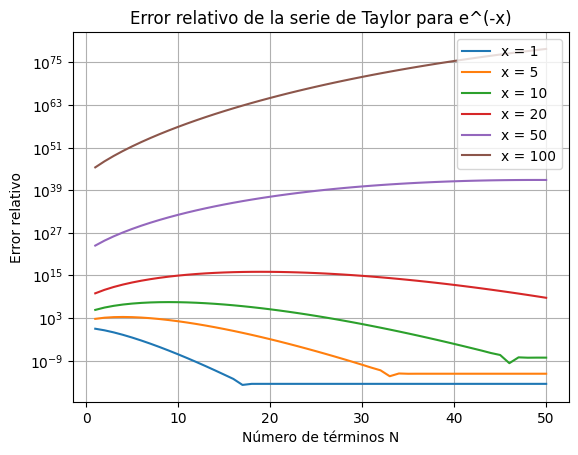

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math


def serie_exp_negativo(x, N):
    '''
    Calcula e^(-x) usando la serie de Taylor hasta N términos.
    '''
    suma = 0
    for n in range(N + 1):
        termino = ((-1)**n) * (x**n) / math.factorial(n)
        suma += termino
    return suma

import math

# Función para imprimir los términos de la serie de e^{-x}
def imprimir_terminos(x, N_max):
    suma = 0
    print(f"Términos de la serie para e^(-{x}):")
    print(f"{'n':>2} {'Término':>20} {'Suma parcial':>25}")

    for n in range(N_max + 1):
        termino = ((-x)**n) / math.factorial(n)
        suma += termino

        # Imprime el término y la suma parcial
        print(f"{n:2d} {termino:20.10e} {suma:25.10e}")

        # Destacar si estamos cerca de n ≈ x - 1
        if abs(n - (x - 1)) < 1:
            print("Cancelación significativa cerca de n ≈ x - 1")

    print(f"\nValor exacto usando math.exp(-{x}): {math.exp(-x):.10e}")

# Probar con x ≈ 10
x = 10
N_max = 20

imprimir_terminos(x, N_max)



def error_relativo(valor_aproximado, valor_real):
    '''
    Calcula el error relativo entre dos valores.
    '''
    return abs(valor_aproximado - valor_real) / abs(valor_real)


valores_x = [1, 5, 10, 20, 50, 100]
N_max = 50

for x in valores_x:
    errores = []
    Ns = list(range(1, N_max + 1))

    for N in Ns:
        aproximado = serie_exp_negativo(x, N)
        exacto = np.exp(-x)
        error = error_relativo(aproximado, exacto)
        errores.append(error)

    plt.plot(Ns, errores, label=f"x = {x}")


plt.yscale("log")
plt.xlabel("Número de términos N")
plt.ylabel("Error relativo")
plt.title("Error relativo de la serie de Taylor para e^(-x)")
plt.legend()
plt.grid()
plt.show()


# 5.

Supongamos que tenemos una función $f(x)$ y queremos calcular su derivada en un punto $x$. Podemos hacerlo manualmente si conocemos la forma matemática de la función, o podemos hacerlo computacionalmente usando la definición de derivada:

$$
\frac{df}{dx} = \lim_{\delta \to 0} \frac{f(x + \delta) - f(x)}{\delta}.
$$

En el computador no podemos tomar el límite cuando $\delta$ tiende a cero, pero podemos obtener una aproximación razonable usando valores pequeños de $\delta$.

- Escriba un programa que:
    - Defina una función $f(x)$ que retorne el valor $x(x-1)$
    - Calcule la derivada de la función en $x = 1$ usando la fórmula anterior con $\delta = 10^{-2}$
    - Compare este resultado con el valor exacto obtenido analíticamente
    
    Los resultados no coincidirán exactamente. ¿Por qué?
    
- Repita el cálculo para $\delta = 10^{-4}, 10^{-6}, 10^{-8}, 10^{-10}, 10^{-12}$, y $10^{-14}$. Observará que la precisión mejora inicialmente al disminuir $\delta$, pero luego empeora. Explique este comportamiento.


In [63]:
def f(x):
    '''
    Función f(x) = x * (x - 1)
    '''
    return x * (x - 1)

def derivada_f(x):
    '''
    Calcula la derivada de la función f(x) = x * (x - 1) en x.
    '''
    return 2 * x - 1

# Aproximar la derivada usando la fórmula del cociente de diferencias
def derivada_aproximada(x, delta):
    return (f(x + delta) - f(x)) / delta

# Punto donde queremos calcular la derivada
x = 1

# Lista de valores de delta
deltas = [1e-2, 1e-4, 1e-6, 1e-8, 1e-10, 1e-12, 1e-14]

# Mostrar encabezado
print("Delta\t\tAprox\t\tExacta\t\tError absoluto")

# Calcular y mostrar resultados
for delta in deltas:
    aprox = derivada_aproximada(x, delta)
    exacta = derivada_f(x)
    error = abs(aprox - exacta)
    print(f"{delta:.0e}\t{aprox:.8f}\t{exacta:.8f}\t{error:.2e}")


Delta		Aprox		Exacta		Error absoluto
1e-02	1.01000000	1.00000000	1.00e-02
1e-04	1.00010000	1.00000000	1.00e-04
1e-06	1.00000100	1.00000000	1.00e-06
1e-08	1.00000000	1.00000000	3.92e-09
1e-10	1.00000008	1.00000000	8.28e-08
1e-12	1.00008890	1.00000000	8.89e-05
1e-14	0.99920072	1.00000000	7.99e-04
